# PCA-ն օգնում է մեզ ավելի լավ հասկանալ Iris dataset-ի տվյալները՝ դրանք բերելով 3 կամ 2 չափանի տարածություն

### Ներմուծում ենք անհրաժեշտ գրադարանները

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np

### Ներբեռնեք iris տվյալները որպես DataFrame

In [54]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target#(0,1,2)
target_names = iris.target_names#('setosa', 'versicolor', 'virginica')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


###  Եթե  ցանկանում ենք փոքրացնել տվյալների չափողականությունը, որպեսզի որևէ մոդել թեթևացնենք կամ կարողանանք վիզուալ պատկերել մեր տվյալները, միայն 2 հատկանիշ ընտրելն ու մյուսները անտեսելը շատ հաճախ լավ տարբերակ չէ, քանի որ կարող ենք կորցնել կարևոր կապեր ու հարաբերություններ հատկանիշների միջև: Այդ պատճառով տվյալները կարող են լավ չբաժանվել և խառնվել իրար

### Շուտով կտեսնենք, որ PCA-ն օգնում է մեզ այդ հարցում՝ պահելով կարևոր ինֆորմացիան և կրճատելով հատկանիշների թիվը
#### Ստորև ներկայացված են երկու մոտեցումների վիզուալ արդյունքներըsults.

### Վիզուալիզացնենք բոլոր հնարավոր առկա հատկանիշների զույգերը

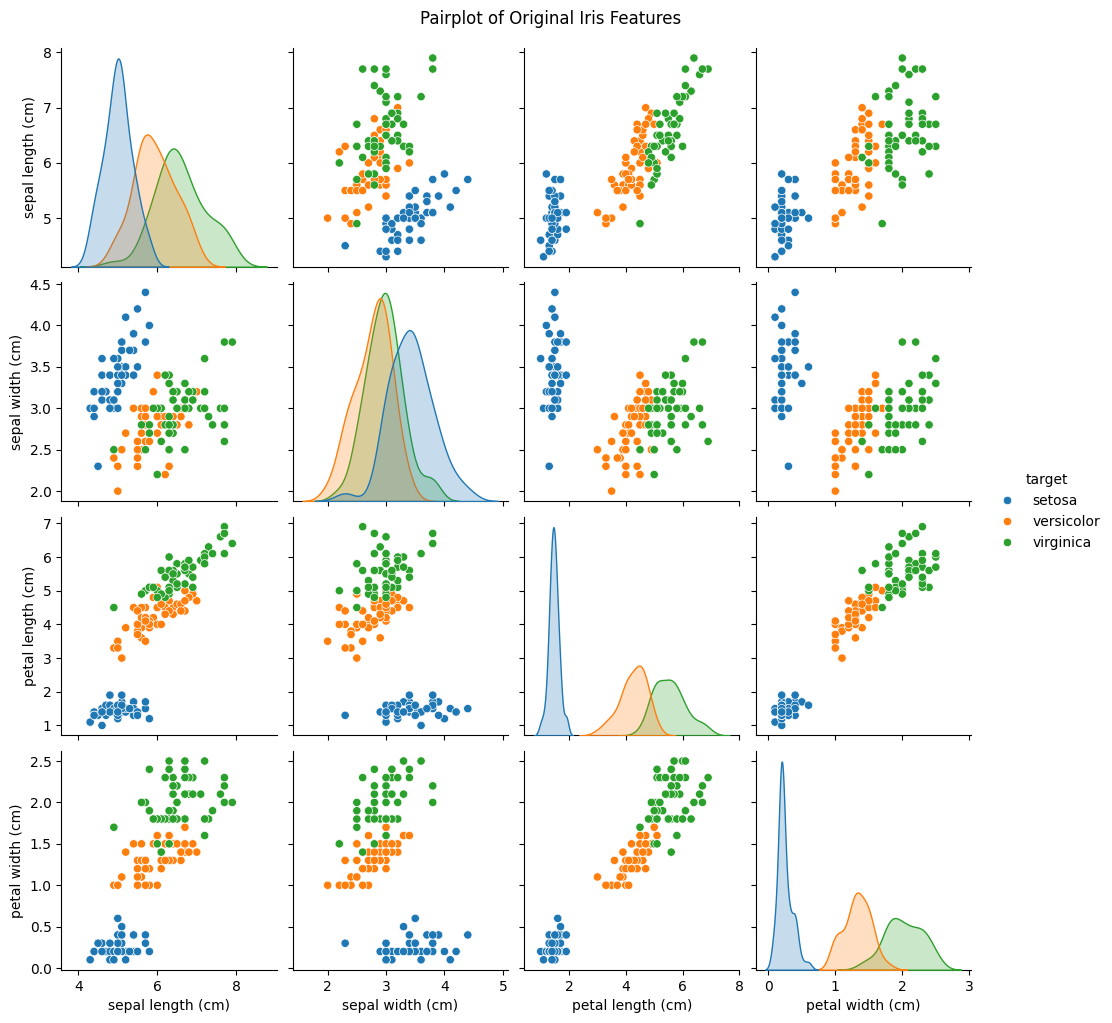

In [62]:
iris.frame["target"] = iris.target_names[iris.target]# replace flower indexes with flower names to plot;
sns.pairplot(iris.frame, hue="target")
plt.suptitle("Pairplot of Original Iris Features", y=1.02)
plt.show()

In [56]:
# sns.scatterplot(
#     data=iris.frame,
#     x="petal length (cm)",
#     y="sepal length (cm)",
#     hue="target"
# )

# Տվյալների չափողականության փոքրացում(2 գլխավոր բաղադրիչ)(PCA)

In [57]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Արդյունքների վիզուալիզացիա

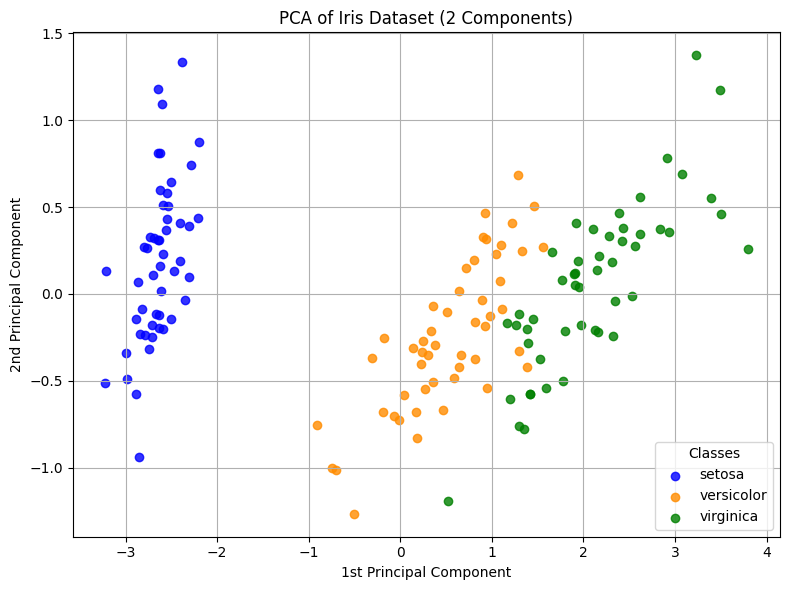

In [59]:
plt.figure(figsize=(8, 6))
colors = ["blue", "darkorange", "green"]

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1],
                color=color, alpha=0.8, label=target_name)

plt.legend(loc="best", title="Classes")
plt.title("PCA of Iris Dataset (2 Components)")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.grid(True)
plt.tight_layout()
plt.show()

# Տվյալների չափողականության փոքրացում(3 գլխավոր բաղադրիչ)(PCA) և վիզուալիզացիա

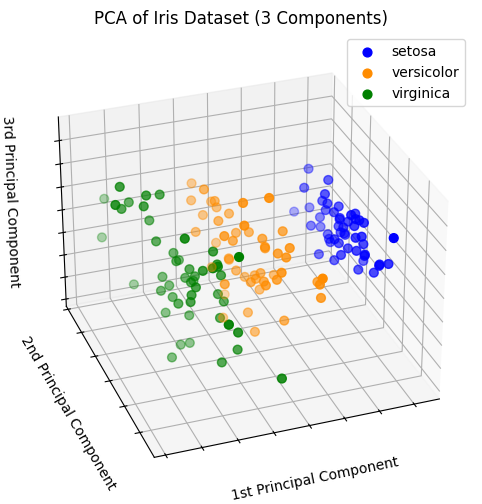

In [60]:
X_reduced = PCA(n_components=3).fit_transform(iris.data)
colors = ['blue', 'darkorange', 'green']

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

for i, color in zip([0,1,2], colors):
    ax.scatter(
        X_reduced[iris.target == i, 0],
        X_reduced[iris.target == i, 1],
        X_reduced[iris.target == i, 2],
        label=iris.target_names[i],
        color=color,
        s=40
    )

ax.set(
    title="PCA of Iris Dataset (3 Components)",
    xlabel="1st Principal Component",
    ylabel="2nd Principal Component",
    zlabel="3rd Principal Component",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.legend()
plt.show()
